### The following code needs a large memory machine to be executed (such as interactively in ipython, as a script or through a jupyter notebook server). 
For convenience, I recorded the obtained correlation values below, and saved the output as smaller files that can be easily visualized without much RAM

# Fig 2g - visualizing neuron activation across secondary structure features

In [5]:
import os
import pandas as pd
import sys
import os
from subprocess import call

#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

sys.path.append("../../")
from common_v2.validation_tools import regr_datasets, subsets, metrics, reps, transfer_datasets, pearson
import common_v2.validation_tools
from IPython.display import display, HTML
import numpy as np

import random
from scipy.stats import ttest_1samp
from scipy.signal import savgol_filter
from sklearn.externals import joblib
from matplotlib.lines import Line2D

from common_v2.plot_style_utils import task_names
import common_v2.plot_style_utils as plot_style_utils

random.seed(42)
np.random.seed(42)

## Including membrane proteins

In [7]:
data_path = "../../../data/"

In [9]:
all_helical_slices = np.load(f"{data_path}all_helical_slices_w_0_3_surrounding.npy")

all_beta_slices = np.load(f"{data_path}all_beta_slices_w_0_3_surrounding.npy")

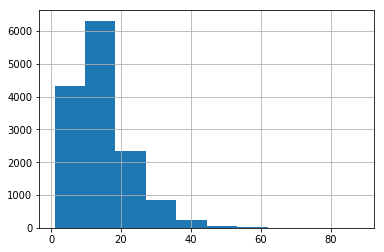

In [10]:
pd.Series(all_helical_slices).map(len).hist()

In [11]:
all_beta_slices.shape

(20217,)

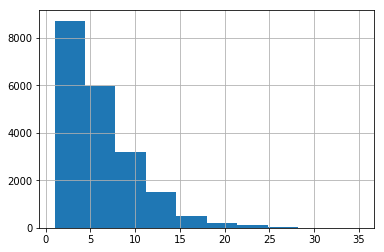

In [12]:
pd.Series(all_beta_slices).map(len).hist()

In [13]:
all_helical_slices.shape

(14122,)

In [14]:
all_helical_scatter = []
for s in all_helical_slices:                                                               
    l = len(s)
    for i,v in enumerate(s):
        all_helical_scatter.append([float(i)/l,v])
all_helical_scatter = pd.DataFrame(all_helical_scatter)

In [15]:
all_beta_scatter = []
for s in all_beta_slices:                                                               
    l = len(s)
    for i,v in enumerate(s):
        all_beta_scatter.append([float(i)/l,v])
all_beta_scatter = pd.DataFrame(all_beta_scatter)

In [16]:
all_helical_scatter[0] = np.around(all_helical_scatter[0].values,2)

all_beta_scatter[0] = np.around(all_beta_scatter[0].values,2)

In [17]:
plot_style_utils.set_pub_plot_context(colors='categorical', context="poster")

palette = sns.color_palette()

Text(0,0.5,'Secondary Structure \n Neuron Activation')

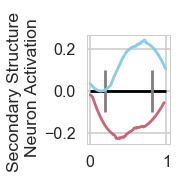

In [19]:
ws = 53
pol_o = 2
fig, a = plt.subplots(1,1, figsize=(1.5,2))

a.plot(all_helical_scatter.groupby(0).mean().index,
savgol_filter(all_helical_scatter.groupby(0).mean().values.flatten(), ws, pol_o),
   label='alpha'
   )

a.plot(all_beta_scatter.groupby(0).mean().index,
savgol_filter(all_beta_scatter.groupby(0).mean().values.flatten(), ws, pol_o),
   label='beta'
    )

plt.hlines(0, 0, 1)
plt.vlines(0.1875,-0.1,0.1, colors='grey')
plt.vlines(0.8125,-0.1,0.1, colors='grey')

plt.ylabel('Secondary Structure \n Neuron Activation')
#plot_style_utils.save_for_pub(fig, path=f"./figures/alphabetaneuron", dpi=500)

## Excluding membrane proteins (an extra check) - it's conceivable that the model could have learned the difference between exposed alpha-helices and those burried in hydrophobic regions

In [21]:
all_helical_slices = np.load(f"{data_path}all_helical_slices_w_0_3_surrounding_no_membr.npy")

all_beta_slices = np.load(f"{data_path}all_beta_slices_w_0_3_surrounding_no_membr.npy")

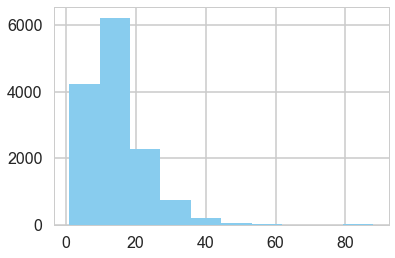

In [22]:
pd.Series(all_helical_slices).map(len).hist()

In [23]:
all_beta_slices.shape

(20058,)

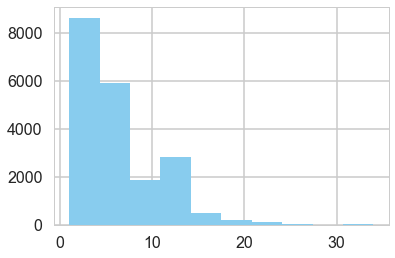

In [24]:
pd.Series(all_beta_slices).map(len).hist()

In [25]:
all_helical_slices.shape

(13783,)

In [26]:
all_helical_scatter = []
for s in all_helical_slices:                                                               
    l = len(s)
    for i,v in enumerate(s):
        all_helical_scatter.append([float(i)/l,v])
all_helical_scatter = pd.DataFrame(all_helical_scatter)

In [27]:
all_beta_scatter = []
for s in all_beta_slices:                                                               
    l = len(s)
    for i,v in enumerate(s):
        all_beta_scatter.append([float(i)/l,v])
all_beta_scatter = pd.DataFrame(all_beta_scatter)

In [28]:
all_helical_scatter[0] = np.around(all_helical_scatter[0].values,2)

all_beta_scatter[0] = np.around(all_beta_scatter[0].values,2)

In [29]:
plot_style_utils.set_pub_plot_context(colors='categorical', context="poster")

palette = sns.color_palette()

#### results are broadly similar:

Text(0,0.5,'Secondary Structure \n Neuron Activation')

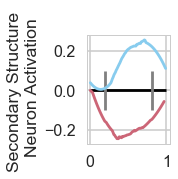

In [31]:
ws = 53
pol_o = 2
fig, a = plt.subplots(1,1, figsize=(1.5,2))

a.plot(all_helical_scatter.groupby(0).mean().index,
savgol_filter(all_helical_scatter.groupby(0).mean().values.flatten(), ws, pol_o),
   label='alpha'
   )

a.plot(all_beta_scatter.groupby(0).mean().index,
savgol_filter(all_beta_scatter.groupby(0).mean().values.flatten(), ws, pol_o),
   label='beta'
    )


plt.hlines(0, 0, 1)
plt.vlines(0.1875,-0.1,0.1, colors='grey')
plt.vlines(0.8125,-0.1,0.1, colors='grey')

plt.ylabel('Secondary Structure \n Neuron Activation')
#plot_style_utils.save_for_pub(fig, path=f"./figures/alphabetaneuron", dpi=500)